This tutorial illustrates how to export expression matrices and cell type labels from `SingleCellExperiment` objects to `.h5` file as input for scJoint using datasets that can be downloaded from 10xGenomics website. The scRNA-seq is downloaded via

```
wget https://cf.10xgenomics.com/samples/cell-exp/4.0.0/SC3_v3_NextGem_DI_PBMC_10K/SC3_v3_NextGem_DI_PBMC_10K_filtered_feature_bc_matrix.h5
```

Analysis of quality control, clustering is done to annotate the cell type for scRNA-seq data as training data. 

The scATAC-seq data is downloaded via

```
wget https://cf.10xgenomics.com/samples/cell-atac/1.2.0/atac_pbmc_10k_v1/atac_pbmc_10k_v1_filtered_peak_bc_matrix.h5
```

and the gene activity matrix is generated by Signac.

## Data from `SingleCellExperiment`

In [7]:
library(SingleCellExperiment)
library(DropletUtils)
library(scater)
library(ggplot2)

Loading required package: ggplot2



In [13]:
sce_10xPBMC_atac <- readRDS("data_10x/sce_10xPBMC_atac.rds")
sce_10xPBMC_atac
sce_10xPBMC_rna <- readRDS("data_10x/sce_10xPBMC_rna.rds")
sce_10xPBMC_rna

class: SingleCellExperiment 
dim: 20233 6913 
metadata(0):
assays(2): counts logcounts
rownames(20233): PLCXD1 GTPBP6 ... S100B PRMT2
rowData names(0):
colnames(6913): AAACGAAAGACACGGT-1 AAACGAAAGAGGTGGG-1 ...
  TTTGTGTTCCGTTTCG-1 TTTGTGTTCGCGCTGA-1
colData names(30): orig.ident nCount_peaks ... nFeature_RNA ident
reducedDimNames(2): LSI UMAP
altExpNames(0):

class: SingleCellExperiment 
dim: 25638 9841 
metadata(1): Samples
assays(2): counts logcounts
rownames(25638): AL627309.1 AL627309.3 ... AC007325.1 AC007325.4
rowData names(3): ID Symbol Type
colnames(9841): AAACCCAGTATCGTAC-1 AAACCCAGTCGGTGAA-1 ...
  TTTGTTGTCCTAGCTC-1 TTTGTTGTCCTATGGA-1
colData names(5): Sample Barcode sizeFactor cluster cellTypes
reducedDimNames(3): PCA UMAP TSNE
altExpNames(0):

In [18]:
table(droplevels(sce_10xPBMC_rna$cellTypes))


CD14+ Monocytes CD16+ Monocytes   Memory CD4+ T    Naive CD8+ T               B 
           3113             396            1231            1260             934 
             NK   Memory CD8+ T              DC          Plasma    Naive CD4+ T 
            431             802             153             107            1395 
      Platelets 
             19 

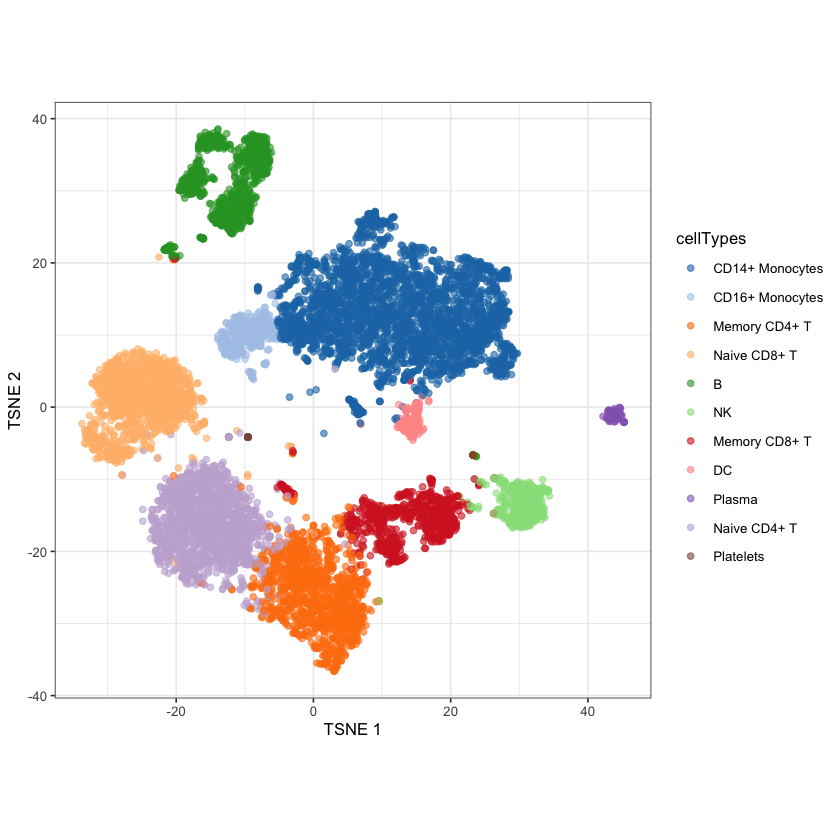

In [14]:
plotTSNE(sce_10xPBMC_rna, colour_by = "cellTypes") + theme(aspect.ratio = 1)

## Saving data as h5 files

In [15]:
# Only keep common genes between two dataset
common_genes <- intersect(rownames(sce_10xPBMC_atac),
                          rownames(sce_10xPBMC_rna))
length(common_genes)

# Extract the logcounts data from sce object
exprs_atac <- logcounts(sce_10xPBMC_atac[common_genes, ])
exprs_rna <- logcounts(sce_10xPBMC_rna[common_genes, ])

[1] 15463

`data_to_h5.R` file provides `write_h5_scJoint()` function to transform the expression matrix in R to `.h5` file, which can be used as input of `process_db.py()` to process input for scJoint.

In [16]:
source("data_to_h5.R")
write_h5_scJoint(exprs_list = list(rna = exprs_rna,
                                   atac = exprs_atac), 
                 h5file_list = c("data_10x/exprs_10xPBMC_rna.h5", 
                                 "data_10x/exprs_10xPBMC_atac.h5"))
write_csv_scJoint(cellType_list =  list(rna = sce_10xPBMC_rna$cellTypes),
                  csv_list = c("data_10x/cellType_10xPBMC_rna.csv"))

Warning message in write_h5_scJoint(exprs_list = list(rna = exprs_rna, atac = exprs_atac), :
“h5file exists! will rewrite it.”


    group     name       otype dclass          dim
0       /   matrix   H5I_GROUP                    
1 /matrix barcodes H5I_DATASET STRING         9841
2 /matrix     data H5I_DATASET  FLOAT 9841 x 15463
3 /matrix features H5I_DATASET STRING        15463


Warning message in write_h5_scJoint(exprs_list = list(rna = exprs_rna, atac = exprs_atac), :
“h5file exists! will rewrite it.”


    group     name       otype dclass          dim
0       /   matrix   H5I_GROUP                    
1 /matrix barcodes H5I_DATASET STRING         6913
2 /matrix     data H5I_DATASET  FLOAT 6913 x 15463
3 /matrix features H5I_DATASET STRING        15463


Warning message in write_csv_scJoint(cellType_list = list(rna = sce_10xPBMC_rna$cellTypes), :
“csv_list exists! will rewrite it.”


In [3]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS/LAPACK: /Users/yingxinlin/opt/anaconda3/envs/R/lib/libopenblasp-r0.3.12.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.4.2       digest_0.6.27     utf8_1.2.1        crayon_1.4.1     
 [5] IRdisplay_1.0     repr_1.1.3        lifecycle_1.0.0   jsonlite_1.7.2   
 [9] evaluate_0.14     pillar_1.6.0      rlang_0.4.10      uuid_0.1-4       
[13] vctrs_0.3.7       ellipsis_0.3.1    IRkernel_1.1.1    tools_4.0.3      
[17] compiler_4.0.3    base64enc_0.1-3   pbdZMQ_0.3-5      htmltools_0.5.1.1